# Rubrica

|Concepto|Porcentaje|
|--|--|
|Descripción del proceso de limpieza y preparación de datos realizado, teniendo en cuenta los algoritmos utilizados. Justitificar utilizando el entendimiento de los datos|15%|
|**Mariana Lozano Roncancio**: Implementación de K-means, descripción de las decisiones más importantes asociadas a la implementación del algoritmo y los hiperparámetros configurados|15%|
|Estudiante 2: Implementación de un segundo algoritmo de libre elección, descripción corta del algoritmo y de las decisiones más importantes asociadas a la implementación y los hiperparámetros configurados|15%|
|Estudiante 3:  Implementación de un tercer algoritmo de libre elección, descripción corta del algoritmo y de las decisiones más importantes asociadas a la implementación y los hiperparametros configurados||15%|
|Análisis de los resultados obtenidos y justificación del modelo recomendado para el caso propuesto|25%|
|Presentación de diapositivas para la organización con resultados, con las recomendaciones|10%|
|Cuaderno asociado, ejecutado|5%|

# Caso

FinanzasAlpes es una empresa emisora de tarjetas de crédito que busca mejorar su estrategia de marketing y personalización de servicios mediante la segmentación de sus clientes según su comportamiento de compra en centros comerciales. La empresa ha identificado que entender los patrones de comportamiento de los clientes podría ayudar a ofrecer productos y servicios más alineados a sus necesidades, mejorar la atención al cliente y aumentar la efectividad de las campañas de marketing. Para lograr este objetivo, FinanzasAlpes ha decidido aplicar técnicas de aprendizaje no supervisado, específicamente algoritmos de agrupación (clustering), para identificar perfiles de clientes con características comunes. La segmentación permitirá a la empresa personalizar su oferta, optimizar la comunicación y diseñar estrategias específicas para cada segmento, mejorando la experiencia del cliente y fortaleciendo la relación con ellos. Para llevar a cabo este estudio, FinanzasAlpes ha contratado a un equipo de científicos de datos, a quienes ha proporcionado un conjunto de datos detallado que incluye información sobre saldos, límites de crédito, hábitos de compra y otros aspectos financieros relevantes, junto con un diccionario de datos que explica el significado y formato de cada variable. El equipo deberá aplicar el algoritmo K-Means y otros dos algoritmos de clustering, evaluar la calidad de la segmentación mediante métricas cuantitativas como el coeficiente de silueta, e interpretar los resultados para identificar patrones significativos que puedan traducirse en recomendaciones estratégicas para FinanzasAlpes. El resultado esperado es una segmentación clara que permita definir perfiles diferenciados de clientes y diseñar estrategias de marketing personalizadas que aumenten la fidelización y satisfacción de los clientes, proporcionando una ventaja competitiva a la empresa.

# 1. Preparacion del notebook


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


# 2. Carga de datos

In [12]:
# Se cargan los datos. 
df_tracks = pd.read_csv(r'C:\Users\MarianaLozano\OneDrive - NOLDATA.CO\Documents\Universidad\Octavo semestre\BI\Lab2-agrupacion-G33-\Lab2-agrupacion-G33-\Lab2-agrupacion-G33-\Datos\Agrupacion_Customer_Data.csv', sep=';', encoding='latin1', index_col=0)

# 3. Perfilamiento de datos

In [13]:
df_tracks.shape

(8950, 17)

In [14]:
df_tracks.head()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
ID,,,,,,,,,,,,,,,,,
C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [29]:
# Revisar las características de los datos: completitud y tipo de dato
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C18950
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SALDO                8950 non-null   float64
 1   F_SALDO              8950 non-null   float64
 2   COMPRAS              8950 non-null   float64
 3   COMPRAS_PUNTUALES    8950 non-null   float64
 4   COMPRAS_PLAZOS       8950 non-null   float64
 5   AVANCE_EFECTIVO      8950 non-null   float64
 6   F_COMPRAS            8950 non-null   float64
 7   F_COMPRAS_PUNTUALES  8950 non-null   float64
 8   F_COMPRAS_PLAZOS     8950 non-null   float64
 9   F_AVANCE_EFECTIVO    8950 non-null   float64
 10  P_AVANCE_EFECTIVO    8950 non-null   int64  
 11  P_COMPRAS            8950 non-null   int64  
 12  LÍMITE_CREDITO       8949 non-null   float64
 13  PAGOS                8950 non-null   float64
 14  PAGOS_MINIMOS        8637 non-null   float64
 15  F_PAGOS_COMPLETOS    8950 non-null  

In [16]:
# Resumen de los estadisticos de las variables numéricas
df_tracks.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


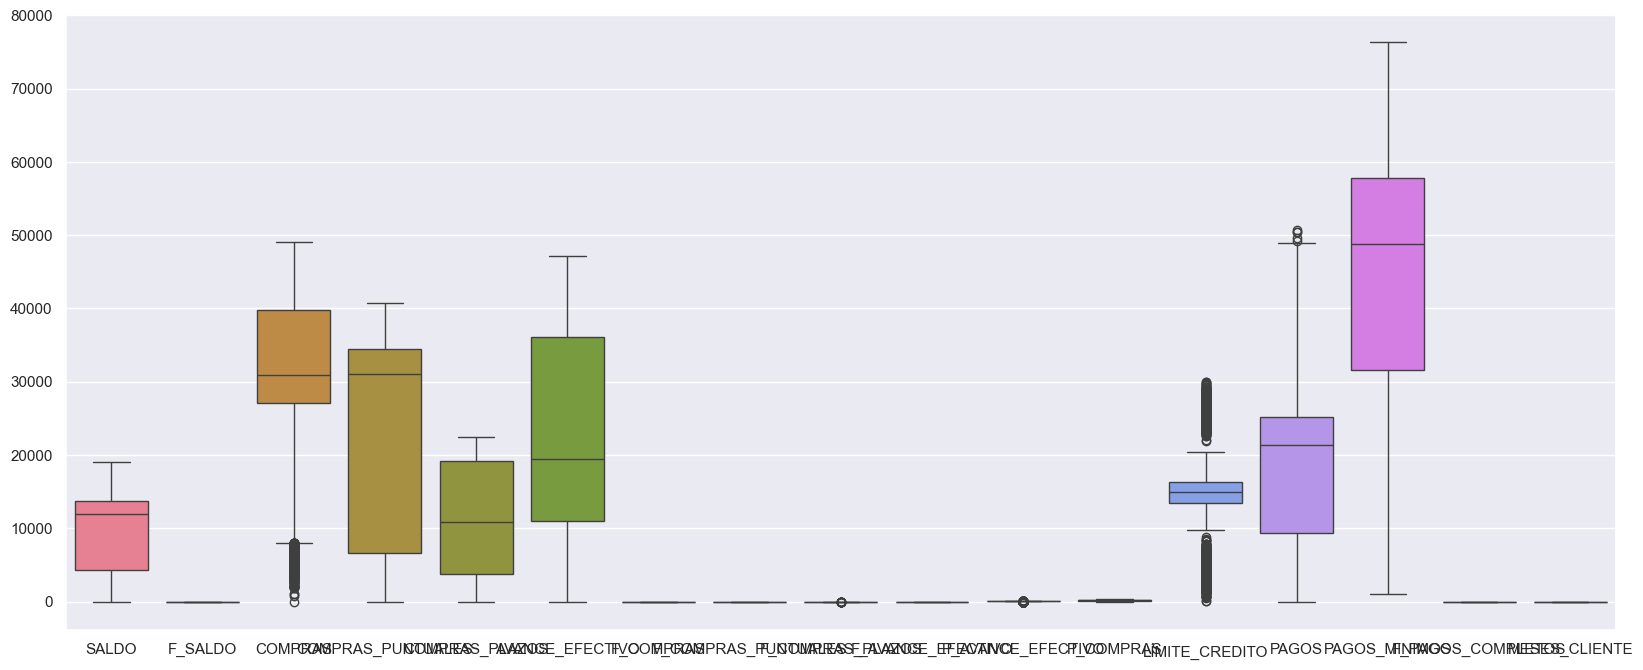

In [17]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks, orient="v")

In [18]:
#Separación de la variable duración (int) de variables float para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = df_tracks.select_dtypes(include = ['float64']).columns
name_cols_int = df_tracks.select_dtypes(include = ['int64']).columns
name_cols_int
#name_cols_float

Index(['P_AVANCE_EFECTIVO', 'P_COMPRAS', 'MESES_CLIENTE'], dtype='object')

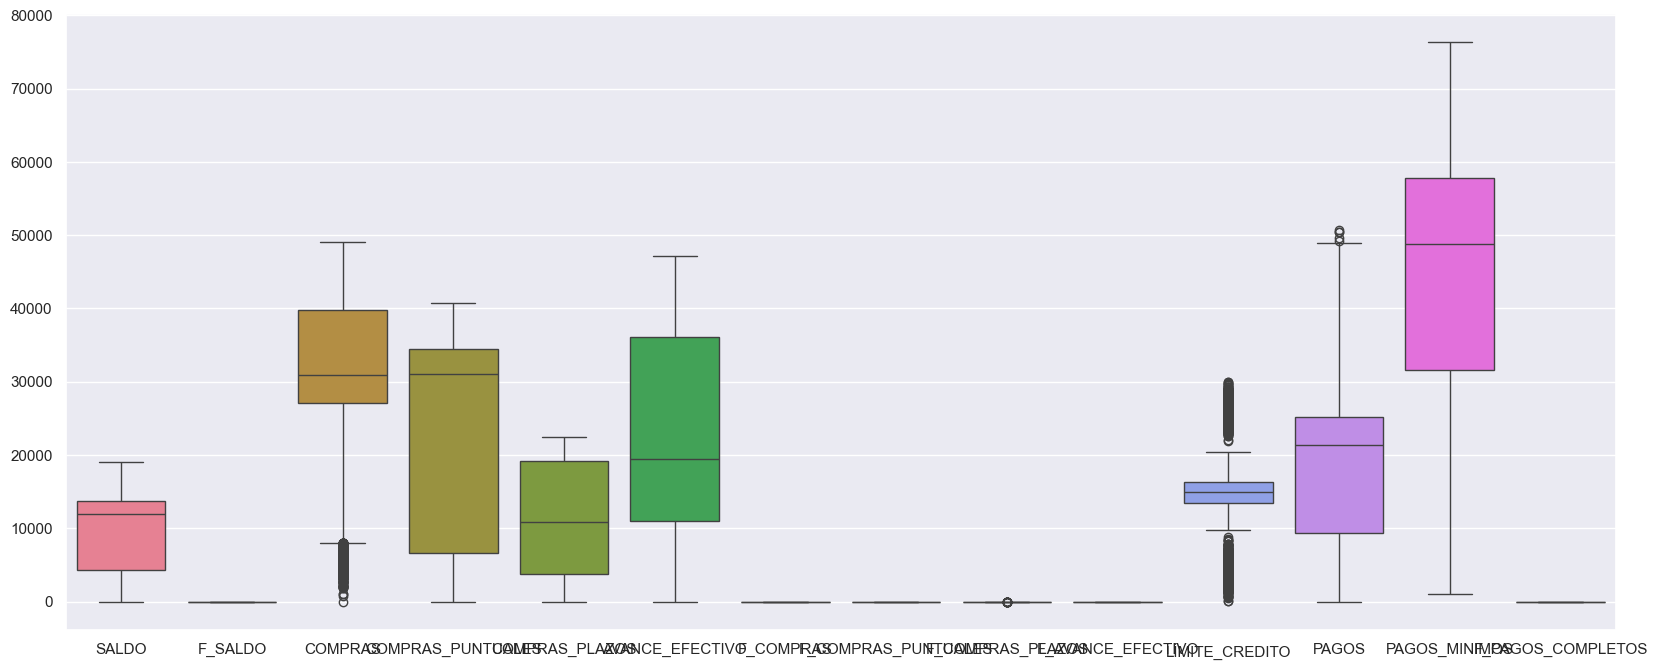

In [19]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[name_cols_float], orient="v")

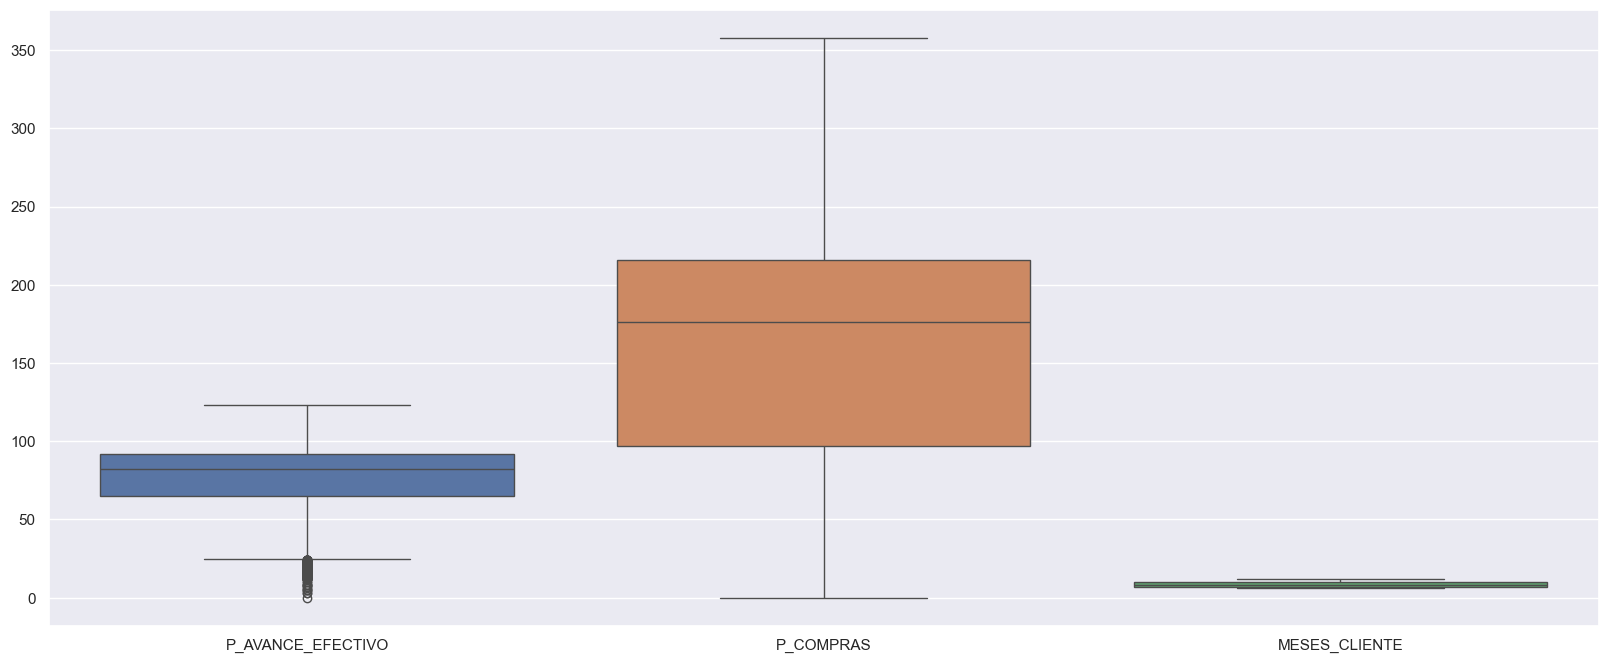

In [20]:
#Visualización de las variables numéricas tipo int
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[name_cols_int], orient="v")

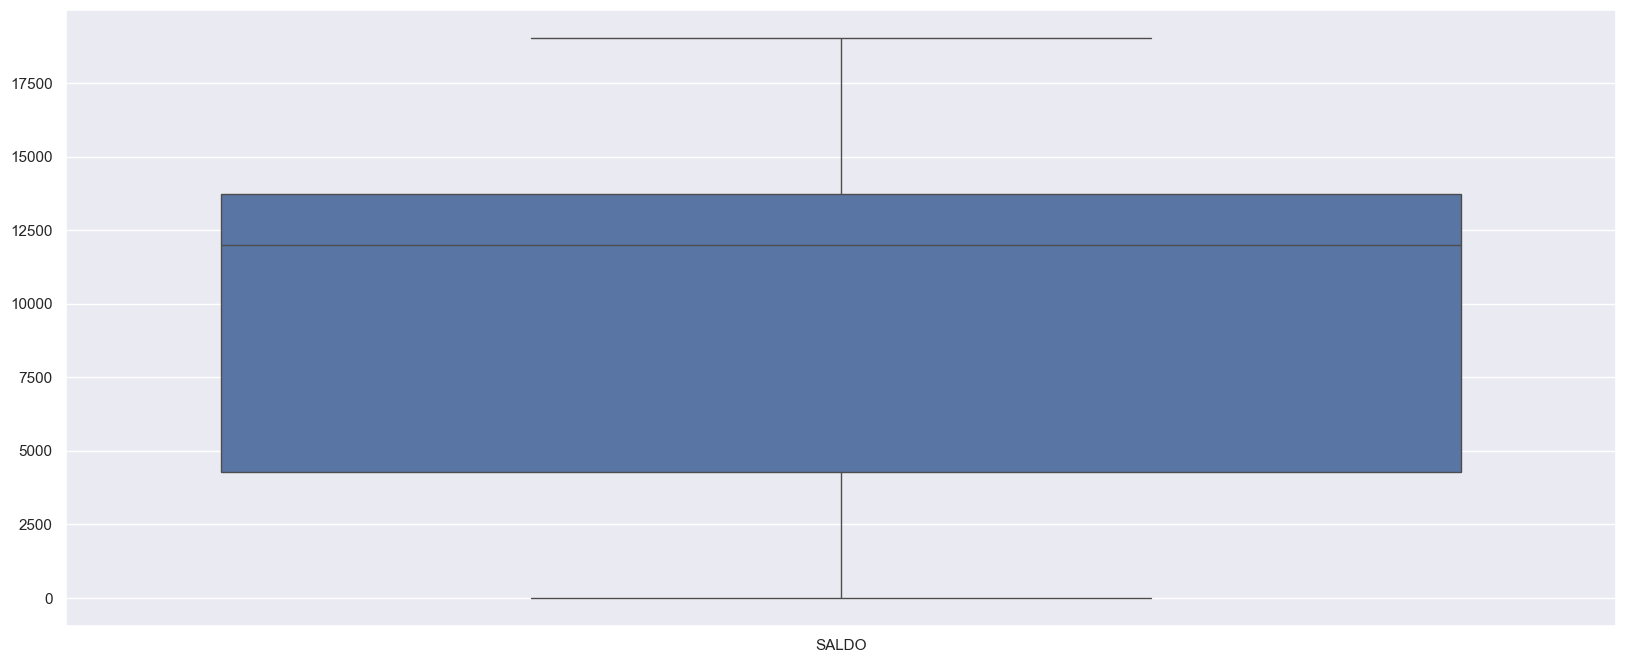

In [22]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_tracks[['SALDO']], orient="v")

In [31]:
#Revisar el contenido de las variables que no son numéricas

df_tracks.select_dtypes(include = ['object']).head()

""
ID
C10001
C10002
C10003
C10004
C10005


# Calidad de los datos


**Dimensiones de calidad**
+ Consistencia
+ Validez
+ Completitud
+ Unicidad

## Consistencia

1. La columna ID debe ser única y sin valores duplicados (cumple con esta condición).
2. Las columnas SALDO, COMPRAS y PAGOS tienen valores positivos, lo que es consistente con la descripción de datos financieros.
3. Las columnas que son relaciones o porcentajes como F_SALDO, F_COMPRAS, F_AVANCE_EFECTIVO deberían estar en el rango [0, 1] o valores porcentuales consistentes (se debe verificar esta condición).

In [33]:
# Verificar que las columnas que son relaciones o porcentajes están en el rango [0, 1]
columns_to_check = ['F_SALDO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS', 'F_AVANCE_EFECTIVO', 'F_PAGOS_COMPLETOS']

for column in columns_to_check:
    if df_tracks[column].between(0, 1).all():
        print(f"La columna {column} está en el rango [0, 1].")
    else:
        print(f"La columna {column} tiene valores fuera del rango [0, 1].")

La columna F_SALDO está en el rango [0, 1].
La columna F_COMPRAS está en el rango [0, 1].
La columna F_COMPRAS_PUNTUALES está en el rango [0, 1].
La columna F_COMPRAS_PLAZOS está en el rango [0, 1].
La columna F_AVANCE_EFECTIVO tiene valores fuera del rango [0, 1].
La columna F_PAGOS_COMPLETOS está en el rango [0, 1].


In [34]:
df_corregido = df_tracks.copy()

### Correcion de datos fuera de rango

In [35]:
# Corregir los valores fuera del rango [0, 1] en las columnas especificadas
for column in columns_to_check:
    df_corregido[column] = df_corregido[column].apply(lambda x: min(max(x, 0), 1))

# Verificar nuevamente que las columnas están en el rango [0, 1]
for column in columns_to_check:
    if df_corregido[column].between(0, 1).all():
        print(f"La columna {column} está en el rango [0, 1] después de la corrección.")
    else:
        print(f"La columna {column} tiene valores fuera del rango [0, 1] después de la corrección.")

La columna F_SALDO está en el rango [0, 1] después de la corrección.
La columna F_COMPRAS está en el rango [0, 1] después de la corrección.
La columna F_COMPRAS_PUNTUALES está en el rango [0, 1] después de la corrección.
La columna F_COMPRAS_PLAZOS está en el rango [0, 1] después de la corrección.
La columna F_AVANCE_EFECTIVO está en el rango [0, 1] después de la corrección.
La columna F_PAGOS_COMPLETOS está en el rango [0, 1] después de la corrección.


In [36]:
df_corregido.head(10)

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
ID,,,,,,,,,,,,,,,,,
C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.000000,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.000000,88,182,14404.70507,6994.688474,62041.61734,0.383186,10
C10006,12439.064890,0.706673,40674.22612,6156.208831,19401.475610,32438.912700,0.836764,0.343936,0.527813,0.970693,103,216,14554.91155,8814.239865,58227.56469,0.398377,10
C10007,5751.875116,0.202635,32509.15916,34929.992110,2951.501163,15831.777600,0.433735,0.572119,0.848748,0.257982,80,99,16427.99721,26477.357790,19768.61317,0.919282,6
C10008,11958.850430,0.731274,40494.41581,9571.367143,18972.549000,34492.971030,0.871211,0.068437,0.509161,0.968966,72,197,14040.66521,5679.381669,52698.25158,0.372649,10
C10009,12887.080990,0.871732,37655.94850,7249.847190,20221.263170,38881.678340,0.884932,0.326394,0.562211,1.000000,88,217,14514.68978,8457.493288,57985.42120,0.307665,10


# Unicidad

1. La columna ID está definida como un identificador único, lo cual se cumple, ya que no hay valores duplicados.
2. No hay registros duplicados en el dataset, lo que mantiene la unicidad y coherencia de la información.

In [40]:
# delete duplciate rows
print("Original shape: ", df_tracks.shape)
df_corregido = df_corregido.drop_duplicates()
print("Shape after removing duplicates: ", df_corregido.shape)

Original shape:  (8950, 17)
Shape after removing duplicates:  (8950, 17)


## Validez
1. La columna ID debe ser de tipo texto o cadena, lo cual se cumple.
2. Las columnas como SALDO, COMPRAS y PAGOS deben ser numéricas y positivas; hasta ahora no se encontraron valores negativos ni inconsistencias.
3. Las columnas que son tasas o porcentajes (F_COMPRAS, F_SALDO, P_COMPRAS) deben tener valores entre 0 y 1 o entre 0% y 100%, por lo que debemos validar este rango.

In [41]:
# Verificar que las columnas que son tasas o porcentajes están en el rango [0, 1] o [0, 100]
columns_to_check_percentages = ['F_COMPRAS', 'F_SALDO', 'P_COMPRAS']

for column in columns_to_check_percentages:
    if df_corregido[column].between(0, 1).all() or df_corregido[column].between(0, 100).all():
        print(f"La columna {column} está en el rango [0, 1] o [0, 100].")
    else:
        print(f"La columna {column} tiene valores fuera del rango [0, 1] o [0, 100].")

La columna F_COMPRAS está en el rango [0, 1] o [0, 100].
La columna F_SALDO está en el rango [0, 1] o [0, 100].
La columna P_COMPRAS tiene valores fuera del rango [0, 1] o [0, 100].


correguir valores fuera de rango P_COMPRAS

In [42]:
# Corregir los valores fuera del rango [0, 1] o [0, 100] en la columna P_COMPRAS
df_corregido['P_COMPRAS'] = df_corregido['P_COMPRAS'].apply(lambda x: min(max(x, 0), 100))

# Verificar nuevamente que la columna P_COMPRAS está en el rango [0, 1] o [0, 100]
if df_corregido['P_COMPRAS'].between(0, 100).all():
    print("La columna P_COMPRAS está en el rango [0, 1] o [0, 100] después de la corrección.")
else:
    print("La columna P_COMPRAS tiene valores fuera del rango [0, 1] o [0, 100] después de la corrección.")

La columna P_COMPRAS está en el rango [0, 1] o [0, 100] después de la corrección.


Las columnas LÍMITE_CREDITO y PAGOS_MINIMOS tienen valores nulos, lo que podría requerir imputación o eliminación de registros según la estrategia de negocio, ya que el diccionario de datos no especifica el rango de valores de estos, no los eliminaremos

In [43]:
# Buscar valores nulos en el DataFrame
valores_nulos = df_corregido.isnull().sum()
print(valores_nulos)

SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64


# Preparacion de los datos